<a href="https://colab.research.google.com/github/brilliantfriezka/Robotics-and-Intelligent-Systems/blob/main/UTS/Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS Robotics and Intelligent System**
*   Nama : Brilliant Friezka Aina
*   NIM : 1103194186
*   Kelas : TK-43-GAB

In [1]:
pip install symforce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.5 MB 40.1 MB/s 
     |████████████████████████████████| 70 kB 5.7 MB/s 
     |████████████████████████████████| 1.5 MB 49.2 MB/s 
     |████████████████████████████████| 82 kB 269 kB/s 
     |████████████████████████████████| 1.5 MB 41.9 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 96 kB 2.4 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [2]:
import symforce

symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")

import symforce.symbolic as sf
from symforce.values import Values
from symforce.notebook_util import display, display_code, display_code_file

In [3]:
inputs = Values(
    x=sf.Symbol("x"),
    y=sf.Rot2.symbolic("c"),
)
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
)

In [4]:
inputs.add(sf.Symbol("foo"))
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
)

In [5]:
x, y = sf.symbols("x y")
expr = x ** 2 + sf.sin(y) / x ** 2
inputs["states"] = Values(p=expr)
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
)

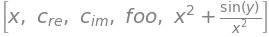

In [6]:
display(inputs.to_storage())

In [7]:
display(inputs.items_recursive())

[('x', x),
 ('y', <Rot2 <C real=c_re, imag=c_im>>),
 ('foo', foo),
 ('states.p', x**2 + sin(y)/x**2)]

In [8]:
display(inputs.keys_recursive())
display(inputs.values_recursive())

['x', 'y', 'foo', 'states.p']

[x, <Rot2 <C real=c_re, imag=c_im>>, foo, x**2 + sin(y)/x**2]

In [9]:
index = inputs.index()
index

OrderedDict([('x',
  IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('y',
  IndexEntry(offset=1, storage_dim=2, _module='symforce.geo.rot2', _qualname='Rot2', shape=None, item_index=None)),
 ('foo',
  IndexEntry(offset=3, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('states',
  IndexEntry(offset=4, storage_dim=1, _module='symforce.values.values', _qualname='Values', shape=None, item_index=OrderedDict([('p', IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None))])))])

In [10]:
inputs2 = Values.from_storage_index(inputs.to_storage(), index)
assert inputs == inputs2
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
)

In [11]:
item_index = inputs.index()["states"].item_index
assert item_index == inputs["states"].index()

In [12]:
inputs["states.blah"] = 3
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  states:   Values(
    p: x**2 + sin(y)/x**2,
    blah: 3,
  ),
)

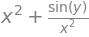

In [13]:
assert inputs["states.p"] is inputs["states"]["p"] is inputs.attr.states.p
display(inputs.attr.states.p)

In [14]:
with sf.scope("params"):
    s = sf.Symbol("cost")
display(s)

In [15]:
v = Values()
v.add(sf.Symbol("x"))
with sf.scope("foo"):
    v.add(sf.Symbol("x"))
    with sf.scope("bar"):
        v.add(sf.Symbol("x"))
display(v)
display(v.attr.foo.bar.x)

Values(
  x: x,
  foo:   Values(
    x: foo.x,
    bar:     Values(
      x: foo.bar.x,
    ),
  ),
)

In [16]:
v = Values()
with v.scope("hello"):
    v["y"] = x ** 2
    v["z"] = sf.Symbol("z")
v

Values(
  hello:   Values(
    y: x**2,
    z: hello.z,
  ),
)

In [17]:
lie_vals = Values()
lie_vals["scalar"] = sf.Symbol("x")
lie_vals["rot3"] = sf.Rot3.symbolic("rot")

sub_lie_vals = Values()
sub_lie_vals["pose3"] = sf.Pose3.symbolic("pose")
sub_lie_vals["vec"] = sf.V3.symbolic("vec")

lie_vals["sub_vals"] = sub_lie_vals

display(lie_vals)

Values(
  scalar: x,
  rot3: <Rot3 <Q xyzw=[rot_x, rot_y, rot_z, rot_w]>>,
  sub_vals:   Values(
    pose3: <Pose3 R=<Rot3 <Q xyzw=[pose.R_x, pose.R_y, pose.R_z, pose.R_w]>>, t=(pose.t0, pose.t1, pose.t2)>,
    vec: Matrix([
[vec0],
[vec1],
[vec2]]),
  ),
)

In [18]:
display(lie_vals.tangent_dim())
display(len(lie_vals.to_tangent()))

In [19]:
display(lie_vals.storage_D_tangent())

⎡1     0        0        0         0           0           0       0  0  0  0 
⎢                                                                             
⎢    rot_w   -rot_z    rot_y                                                  
⎢0   ─────   ───────   ─────       0           0           0       0  0  0  0 
⎢      2        2        2                                                    
⎢                                                                             
⎢    rot_z    rot_w   -rotₓ                                                   
⎢0   ─────    ─────   ──────       0           0           0       0  0  0  0 
⎢      2        2       2                                                     
⎢                                                                             
⎢   -rot_y    rotₓ     rot_w                                                  
⎢0  ───────   ────     ─────       0           0           0       0  0  0  0 
⎢      2       2         2                          

In [20]:
residual = sf.Matrix(6, 1)
residual[0:3, 0] = lie_vals["rot3"] * lie_vals["sub_vals.vec"]
residual[3:6, 0] = lie_vals["sub_vals.pose3"] * lie_vals["sub_vals.vec"]
display(residual)

⎡                         ⎛         2          2    ⎞                         
⎢                    vec₀⋅⎝- 2⋅rot_y  - 2⋅rot_z  + 1⎠ + vec₁⋅(-2⋅rot_w⋅rot_z +
⎢                                                                             
⎢                                                               ⎛        2    
⎢                    vec₀⋅(2⋅rot_w⋅rot_z + 2⋅rotₓ⋅rot_y) + vec₁⋅⎝- 2⋅rotₓ  - 2
⎢                                                                             
⎢                                                                             
⎢                    vec₀⋅(-2⋅rot_w⋅rot_y + 2⋅rotₓ⋅rot_z) + vec₁⋅(2⋅rot_w⋅rotₓ
⎢                                                                             
⎢               ⎛            2             2    ⎞                             
⎢pose.t0 + vec₀⋅⎝- 2⋅pose.R_y  - 2⋅pose.R_z  + 1⎠ + vec₁⋅(-2⋅pose.R_w⋅pose.R_z
⎢                                                                             
⎢                                                   

In [21]:
residual_D_tangent = residual.jacobian(lie_vals)
display(residual_D_tangent.shape)
display(residual_D_tangent)

⎡                                                                             
⎢0     vec₁⋅(2⋅rot_w⋅rot_y + 2⋅rotₓ⋅rot_z) + vec₂⋅(2⋅rot_w⋅rot_z - 2⋅rotₓ⋅rot_
⎢                                                                             
⎢                                               ⎛       2       2        2    
⎢0  vec₁⋅(-2⋅rot_w⋅rotₓ + 2⋅rot_y⋅rot_z) + vec₂⋅⎝- rot_w  + rotₓ  - rot_y  + r
⎢                                                                             
⎢         ⎛     2       2        2        2⎞                                  
⎢0   vec₁⋅⎝rot_w  - rotₓ  - rot_y  + rot_z ⎠ + vec₂⋅(-2⋅rot_w⋅rotₓ - 2⋅rot_y⋅r
⎢                                                                             
⎢                                                                             
⎢0                                         0                                  
⎢                                                                             
⎢                                                   